In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pdhg jnv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
start = time.time()
#read data in chunks of 1 million rows at a time
A1 = pd.read_csv('C:\\unsw-nb15\\UNSW_2018_IoT_Botnet_Full5pc_1.csv', low_memory=False)
A2 = pd.read_csv('C:\\unsw-nb15\\UNSW_2018_IoT_Botnet_Full5pc_2.csv', low_memory=False)
A3 = pd.read_csv('C:\\unsw-nb15\\UNSW_2018_IoT_Botnet_Full5pc_3.csv', low_memory=False)
A4 = pd.read_csv('C:\\unsw-nb15\\UNSW_2018_IoT_Botnet_Full5pc_4.csv', low_memory=False)
df = pd.concat([A1,A2,A3,A4])

In [ ]:
df.head()

In [2]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
df2=df.apply(LabelEncoder().fit_transform)

In [ ]:
df2.head()

In [ ]:
plt.figure(figsize=(18,18))
data_corr=df2.corr()
sns.heatmap(data_corr, cmap = 'coolwarm')

In [3]:
X= df2.drop(['attack','category','subcategory','pkSeqID'], axis=1)

In [4]:
y= df2['category']

In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter

labels = y.unique()

classes = y.nunique()
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)

number of labels: 5
instances per label
 0    1926624
1    1650260
3      91082
2        477
4         79
Name: category, dtype: int64
labels: [1 0 2 3 4]


In [ ]:
result = pd.concat([X,y],axis=1)

In [ ]:
result

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaled_features = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42) 

In [9]:
from sklearn.decomposition import PCA
#pca = PCA()
pca = PCA(0.99)
#
# Determine transformed features
#

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(sum(pca.explained_variance_ratio_))

In [10]:
# Herbir Değişken için Ortalama Vektör Hesaplanmıştır
mean_vec = np.mean(X_train_pca, axis=0)
#Kovaryans Matrisi
cov_mat = (X_train_pca - mean_vec).T.dot((X_train_pca - mean_vec)) / (X_train_pca.shape[0]-1)
#Özvektörler ve Özdeğerlerin Hesaplanmıştır
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Özdeğer ve özvektör başlıklarının tuple haline getirilmiştir
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Tuple'lar sıralanmıştır
eig_pairs.sort(key=lambda x: x[0], reverse=True)
#Açıklanan Varyanslar ve Kümüle Varyans Hesaplanmıştır
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#Bileşenlerin Açıkladıkları Varyanslar(ilk 10)
var_exp[:40]

[37.2127364540147,
 14.150449506615855,
 11.813426704623607,
 6.311545908822383,
 4.816641061261616,
 3.5949415141186387,
 3.192845427155174,
 2.890000097684234,
 2.6511940865506713,
 2.263563037604835,
 1.9786957730572805,
 1.6989627757026078,
 1.5300413537634396,
 1.131838115940308,
 1.0369460121154215,
 1.0010268928629074,
 0.6281127174527312,
 0.49262880382074964,
 0.4121918537651282,
 0.3214294603151279,
 0.2742213102470748,
 0.2326733131147635,
 0.19401250949868695,
 0.16987530989201743]

In [11]:
data = X_train_pca

In [12]:
X_test_pca.shape

(917131, 24)

In [14]:
y_train_pca=y_train

In [15]:
target = y_train

In [16]:
from Py_FS.filter import PCC as FS
solution = FS(data, target)

In [17]:
solution.scores

array([0.53362329, 0.14796411, 0.28760217, 0.90769231, 0.42278634,
       0.18025606, 0.26120435, 0.47795341, 0.15355053, 0.2029624 ,
       0.2105716 , 0.39908854, 0.21011731, 0.16244314, 0.28985411,
       0.29663827, 0.13039678, 0.16153846, 0.1654733 , 0.13905237,
       0.18223054, 0.22578749, 0.25320651, 0.18243255])

In [18]:
solution.ranks

array([ 1, 21,  7,  0,  3, 16,  8,  2, 20, 13, 11,  4, 12, 18,  6,  5, 23,
       19, 17, 22, 15, 10,  9, 14], dtype=int64)

Weight for the classification accuracy [0-1]: 0.9
Enter the percentage of data wanted for valdiation [0, 100]: 15

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9707853576410175
Number of Features: 7
----------------------------------------

Bat 1 - Fitness: 0.9707853576410175, Number of Features: 7
Bat 2 - Fitness: 0.9707853576410175, Number of Features: 7
Bat 3 - Fitness: 0.9707548276549982, Number of Features: 7
Bat 4 - Fitness: 0.9707526469417112, Number of Features: 7
Bat 5 - Fitness: 0.9707264783822661, Number of Features: 7
Bat 6 - Fitness: 0.9707024905361081, Number of Features: 7
Bat 7 - Fitness: 0.9666383173939346, Number of Features: 8
Bat 8 - Fitness: 0.9666252331142121, Number of Features: 8
Bat 9 - Fitness: 0.9666230524009249, Number of Features: 8
Bat 10 - Fitness: 0.9624520243076842, Number of Features: 9
Bat 11 - Fitness: 0.9624520243076842, Number of Features: 9
Bat 12 - Fitness: 0.9624433014545358,

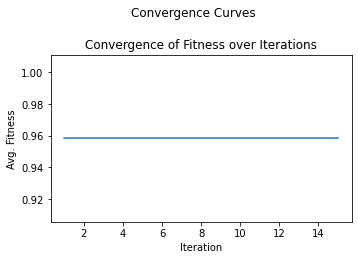

In [19]:
from Py_FS.wrapper.nature_inspired.BBA import BBA as FS
solution = FS(num_agents=30, max_iter=15, train_data=data, train_label=target, save_conv_graph=True)

In [20]:
solution.best_agent

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0.])

In [21]:
solution.best_accuracy

0.9999466936752046

In [ ]:
solution.execution_time

In [23]:
columns = ['pca_comp_%i' % i for i in range(24)]
X_train2  = pd.DataFrame(X_train_pca, columns=columns)
X_train2.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23
0,3.648297,1.242865,-1.645293,0.741264,-2.076088,-0.444660,0.870808,0.516947,-0.143725,1.957671,...,-0.571000,0.378859,0.020892,0.205140,-0.210512,0.256952,-0.220767,-0.060851,-0.232208,0.051715
1,-0.805165,-0.298863,-3.779999,-0.478845,-0.893225,1.771682,-0.133028,0.859207,-0.575643,0.074760,...,-0.401114,0.373154,0.075395,-0.164578,0.041864,0.072026,0.362605,-0.086026,-0.136097,-0.010052
2,-1.294348,0.979061,1.938560,-2.268225,0.058681,-0.642058,-1.010681,0.715686,-0.417254,1.398848,...,0.822984,-0.286407,-0.173998,-0.304933,0.032770,-0.143578,-0.489607,0.013676,0.178260,-0.048847
3,-4.502832,4.604319,1.656414,1.574442,-1.441991,0.612461,0.842254,0.747514,-0.538618,-1.146711,...,-0.371405,-0.404971,0.615564,0.246918,0.296615,0.006742,0.353019,0.766214,0.207407,-0.174029
4,5.317497,2.016237,-0.726584,0.491840,-0.884251,1.035518,-1.484488,-1.962315,-0.154792,1.333346,...,-0.709574,-0.015505,-0.325116,0.016362,0.004887,-0.199258,-0.428554,-0.091376,0.091790,-0.154810


In [24]:
X_train= X_train2[["pca_comp_3", "pca_comp_8","pca_comp_11","pca_comp_13", "pca_comp_15","pca_comp_16", "pca_comp_20"]]

In [25]:
columns = ['pca_comp_%i' % i for i in range(24)]
X_test2  = pd.DataFrame(X_test_pca, columns=columns)
X_test2.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23
0,2.085120,0.937724,-2.323164,1.775566,-0.992801,-0.579593,0.004494,1.361503,-1.264194,-0.366968,...,0.109851,-0.087824,0.317506,0.008005,0.146336,0.262870,-0.770987,0.110169,-0.101504,0.065739
1,-4.709991,2.332422,-0.258908,-0.033469,-1.918874,-0.161965,0.738691,0.186705,-0.783600,-0.205786,...,-0.250196,0.082249,0.349148,0.020620,-0.004960,0.098471,0.410021,0.624580,0.348282,-0.025954
2,1.868450,-3.123672,-0.148013,-1.367989,0.102643,1.933693,-0.394120,-0.000535,-0.954633,-0.534427,...,0.383260,-0.212828,0.768262,0.064564,0.191119,0.223339,-0.015522,-0.028080,0.123435,-0.052221
3,2.194617,-1.980901,-0.202466,-0.929625,-0.283514,0.601982,-0.577694,-0.420290,1.978710,0.415943,...,0.732317,-0.406598,0.603409,0.255214,-0.062578,0.050070,0.333746,-0.012287,-0.208782,-0.128113
4,0.630526,9.329283,20.512765,24.032601,4.259967,17.129620,5.951920,9.477170,7.273596,-2.625627,...,8.948711,11.367018,-1.081822,-0.868604,1.177778,-0.397851,-3.201659,-5.266165,-1.698030,-0.145044


In [26]:
X_test= X_test2[["pca_comp_3", "pca_comp_8","pca_comp_11","pca_comp_13", "pca_comp_15","pca_comp_16", "pca_comp_20"]]

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resample,y_resample= oversample.fit_resample(X_train, y_train)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
# Conv1D + LSTM
from keras.layers.convolutional import Conv1D 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [29]:
from tensorflow.keras.layers import BatchNormalization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [30]:
X_train = X_train.values
X_test = X_test.values

In [31]:
y_train1 = to_categorical(y_resample, num_classes=5)
y_test1 = to_categorical(y_test, num_classes=5)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [33]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

In [34]:
def model1():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(7, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(5), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(7, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(5), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(7, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(5), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
X_resample= X_resample.to_numpy()

In [36]:
# reshape the data for CNN
X_train1 = X_resample.reshape(len(X_resample), X_resample.shape[1], 1)
X_test1 = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train1.shape, X_test1.shape

((7223875, 7, 1), (917131, 7, 1))

Epoch 1/500
90299/90299 [==============================] - 5003s 55ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 6.1312 - val_accuracy: 4.2913e-05
Epoch 2/500
90299/90299 [==============================] - 368s 4ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 28.1852 - val_accuracy: 0.6619
Epoch 3/500
90299/90299 [==============================] - 322s 4ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 18.0657 - val_accuracy: 0.3379
Epoch 4/500
90299/90299 [==============================] - 319s 4ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 3.3847 - val_accuracy: 0.8339
Epoch 5/500
90299/90299 [==============================] - 301s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 7.8721 - val_accuracy: 0.2079
Epoch 6/500
90299/90299 [==============================] - 322s 4ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 3.2800 - val_accuracy: 0.9430
Epoch 7/500
90299/90299 [==============================] - 406s 4ms/step - loss: 0.0017 - accuracy

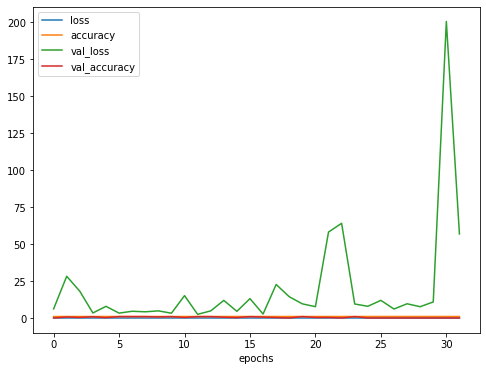

In [37]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
K.clear_session()
model = model1()
history = model.fit(X_train1,y_train1, #y_resample
                    epochs=500, batch_size=64, validation_split=0.2, callbacks=[callback])
### check the loss trend of epochs
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))

import matplotlib.pyplot as plt
plt.show()

In [46]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [47]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 5), round(precision,5), \
                                     round(recall, 5), round(f1_score,5)]
    return df_performance

In [40]:
# predicting on training set
y_train_pred_prob = model.predict(X_train1)
y_test_pred_prob = model.predict(X_test1)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

28661/28661 [==============================] - 892s 31ms/step


In [41]:
le = preprocessing.LabelEncoder()
    
y_trainc = le.fit_transform(y_train)

y_testc= le.transform(y_test)

In [42]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_resample)
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1444775
           1       1.00      1.00      1.00   1444775
           2       0.98      1.00      0.99   1444775
           3       0.95      1.00      0.98   1444775
           4       1.00      0.92      0.96   1444775

    accuracy                           0.98   7223875
   macro avg       0.98      0.98      0.98   7223875
weighted avg       0.98      0.98      0.98   7223875



,accuracy,precision,recall,f1_score
0,0.99643,0.99981,0.98263,0.99115
1,0.99965,0.99987,0.99839,0.99913
2,0.99694,1.0,0.98492,0.9924
3,0.98998,0.99994,0.95233,0.97555
4,0.98315,0.91573,1.0,0.95601


In [43]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test_true_labels,y_test_pred_labels))
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    481849
           1       1.00      1.00      1.00    412540
           2       0.95      0.99      0.97       119
           3       1.00      1.00      1.00     22606
           4       1.00      0.76      0.87        17

    accuracy                           1.00    917131
   macro avg       0.99      0.95      0.97    917131
weighted avg       1.00      1.00      1.00    917131



,accuracy,precision,recall,f1_score
0,0.99984,0.99992,0.99978,0.99985
1,0.99983,0.99974,0.99988,0.99981
2,0.99999,0.95161,0.9916,0.97119
3,0.99997,0.9992,0.99978,0.99949
4,1.0,1.0,0.76471,0.86667


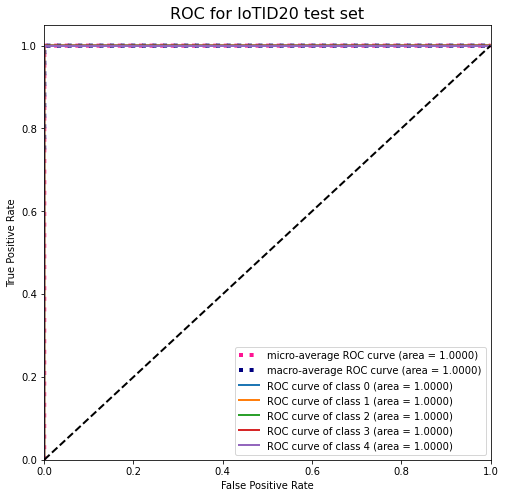

In [44]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for IoTID20 test set')

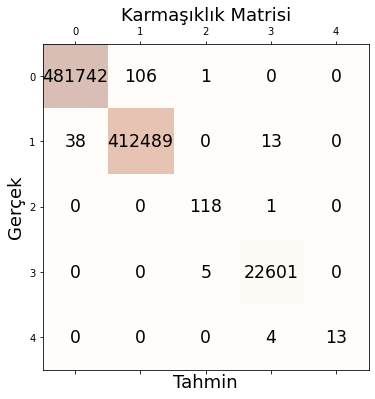

In [58]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Tahmin', fontsize=18)
plt.ylabel('Gerçek', fontsize=18)
plt.title('Karmaşıklık Matrisi', fontsize=18)
plt.show()